<a href="https://colab.research.google.com/github/MariangelaPol/Deep-Learning---CIFAR20-CIFAR40-CIFAR60-CIFAR80/blob/main/Loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Describe the Dataset and any issues with it**

In [ ]:
#Insterting some important libraries for the upcoming analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Inserting the dataset(loan_data) and check the first rows
df = pd.read_csv('df.csv')
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [ ]:
#This dataset contains 10000 rows and 55 columns.
df.shape

(10000, 55)

In [ ]:
#Find some valuable first inputs with one glance
df.describe().T

,count,mean,std,min,25%,50%,75%,max
emp_length,9183.0,5.930306,3.703734,0.00,2.0000,6.000,10.0000,1.000000e+01
annual_income,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.000,95000.0000,2.300000e+06
debt_to_income,9976.0,19.308192,15.004851,0.00,11.0575,17.570,25.0025,4.690900e+02
annual_income_joint,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.000,151545.5000,1.100000e+06
debt_to_income_joint,1495.0,19.979304,8.054781,0.32,14.1600,19.720,25.5000,3.998000e+01
delinq_2y,10000.0,0.216000,0.683660,0.00,0.0000,0.000,0.0000,1.300000e+01
months_since_last_delinq,4342.0,36.760709,21.634939,1.00,19.0000,34.000,53.0000,1.180000e+02
earliest_credit_line,10000.0,2001.290000,7.795510,1963.00,1997.0000,2003.000,2006.0000,2.015000e+03
inquiries_last_12m,10000.0,1.958200,2.380130,0.00,0.0000,1.000,3.0000,2.900000e+01
total_credit_lines,10000.0,22.679600,11.885439,2.00,14.0000,21.000,29.0000,8.700000e+01


In [ ]:
#the dataset has null values
df.isnull().values.any()

True

In [ ]:
#Checking which columns have null values
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [ ]:
#Total percentage of null values in the data (approx. 7%)
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.0767109090909091

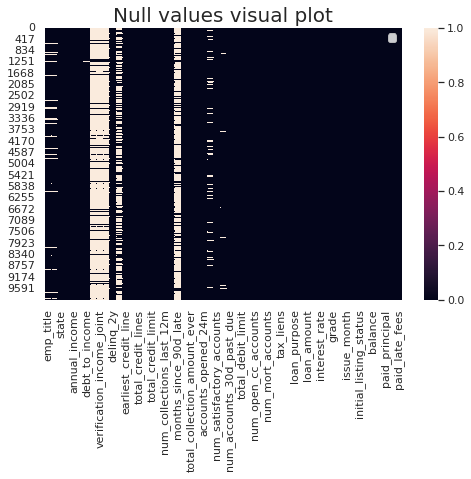

In [ ]:
#Ploting null values with heat map (understand it better)
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(df.isnull())
plt.title('Null values visual plot',fontdict={'fontsize': 20})
plt.legend(df.isnull())
plt.show()

In [ ]:
#Creating a dataframe to display percentage of null values
#each row represents the number of columns with less than the specific percentage

a = pd.DataFrame()
a['Percentage of null values']=['10% or less','20% or less','30% or less','40% or less','50% or less','60% or less','70% or less']

ten_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.1])
twenty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.2])
thirty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.3])
fourty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.4])
fifty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.5])
sixty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.6])
seventy_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.7])


a['No.of columns'] = [ten_percent,twenty_percent,thirty_percent,fourty_percent,fifty_percent,sixty_percent,seventy_percent]
a

,Percentage of null values,No.of columns
0,10% or less,49
1,20% or less,50
2,30% or less,50
3,40% or less,50
4,50% or less,50
5,60% or less,51
6,70% or less,51


In [ ]:
#the column with the null values are creating noise in our dataset so in order not to remove them all we will keep
#these ones that are having less than 40% null values ( row3->50 columns) 
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.4]]
df.shape

(10000, 50)

In [ ]:
#checking again for null values
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit

In [ ]:
df['emp_title'].value_counts()

manager                     218
owner                       204
teacher                     201
driver                      123
sales                        97
                           ... 
corporate tax director        1
captain-fire department       1
intervention specialist       1
coffee roaster                1
toolmaker                     1
Name: emp_title, Length: 4741, dtype: int64

In [ ]:
unemployed = ['unemployed', 'none', 'Unemployed', 'other', 'Other']
for item in unemployed:
    if item in df['emp_title']:
        print("Found It at ", item)

In [ ]:
#seems that nan are all the unemploed --> replace nan values with unemployed
df['emp_title'] = df['emp_title'].fillna("Unemployed")

In [ ]:
# replace null values  with median
df['months_since_last_credit_inquiry'].fillna(df['months_since_last_credit_inquiry'].median(),inplace=True)
df['num_accounts_120d_past_due'].fillna(df['num_accounts_120d_past_due'].median(),inplace=True)
df['debt_to_income'].fillna(df['debt_to_income'].median(),inplace=True)
df['emp_length'].fillna(df['emp_length'].median(),inplace=True)

In [ ]:
#checking again for null values. Seems that we are in a good place now
df.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc

In [ ]:
#exploring more the data + datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         10000 non-null  object 
 1   emp_length                        10000 non-null  float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    10000 non-null  float64
 7   delinq_2y                         10000 non-null  int64  
 8   earliest_credit_line              10000 non-null  int64  
 9   inquiries_last_12m                10000 non-null  int64  
 10  total_credit_lines                10000 non-null  int64  
 11  open_credit_lines                 10000 non-null  int64  
 12  total

In [ ]:
#do this procedure for some columns in order to understand them more
df['grade'].value_counts() 

B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: grade, dtype: int64

In [ ]:
#10000 rows and 50 columns
df.shape

(10000, 50)

Generally as reffered in the documentation too the dataset represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. I ended up with 1000 rows and 50 columns. The main data prepocessing actions that I made was: 
*   Handling missing data
*   Handling categorical data (next chapter)


# **Visualizations**

**Fist Vizualization**: Number of loans per loan status

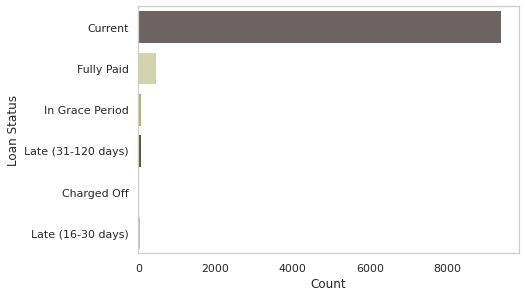

In [ ]:
plt.figure(figsize=(15, 10))
loan_status = df.loan_status.unique().tolist()
plt.subplot(2, 2, 1)
sns.countplot(y='loan_status', data=df,palette=["#6c6361","#d9d8a8",'#c5be54',"#635e21","#847474","#bcbdbf"])
plt.grid(False)
plt.ylabel("Loan Status")
plt.xlabel("Count")
plt.show()

**Second Vizualization:** In the same pattern as the above number of loans per category and per loan status

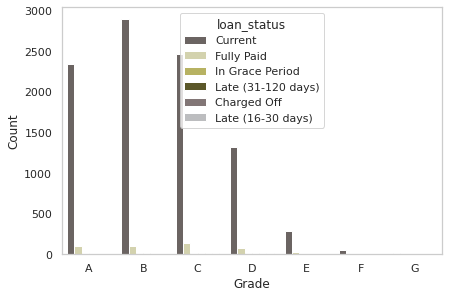

In [ ]:
plt.figure(figsize=(15, 10))
grade = sorted(df.grade.unique().tolist())
plt.subplot(2, 2, 1)
sns.countplot(x='grade', data=df, hue='loan_status', order=grade,palette=["#6c6361","#d9d8a8",'#c5be54',"#635e21","#847474","#bcbdbf"])
plt.ylabel("Count")
plt.xlabel("Grade")
plt.grid(False)
plt.show()

**Third Vizualization:** 
*   How data is distributed across its different values
*   Finding skew in data (if it is normally distributed we can use linear regression for the next question)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


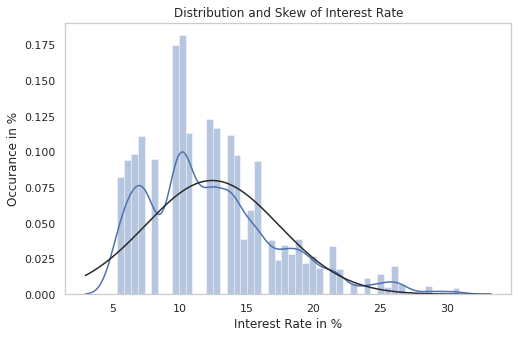

In [ ]:
from scipy.stats import norm

sns.distplot(df['interest_rate'], fit=norm)
plt.title("Distribution and Skew of Interest Rate")
plt.xlabel("Interest Rate in %")
plt.ylabel("Occurance in %")
plt.grid(False)
plt.show()


**Fourth visualization:** Employment length vs interest rate (good for checking trends)

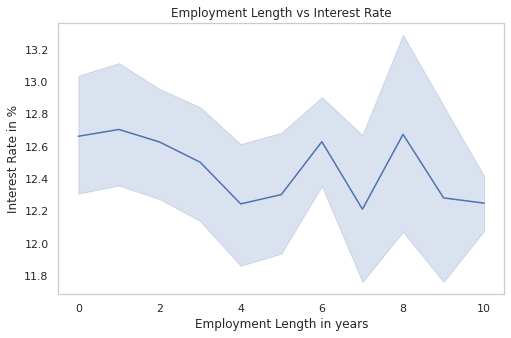

In [ ]:
sns.lineplot(x=df['emp_length'], y=df['interest_rate'])
plt.title("Employment Length vs Interest Rate")
plt.xlabel("Employment Length in years")
plt.ylabel("Interest Rate in %")
plt.grid(False)
plt.show()

**Fifth visualization:** Like hybrid box plot. Checking the peaks of the data for Home Ownership

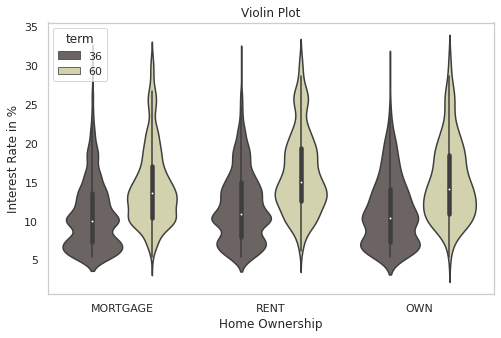

In [ ]:
sns.violinplot(x="homeownership", y="interest_rate", data=df, hue="term",palette=["#6c6361","#d9d8a8"])
plt.title("Violin Plot")
plt.xlabel("Home Ownership")
plt.ylabel("Interest Rate in %")
plt.grid(False)
plt.show()

In [ ]:
#categorical to numerical
#one hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        
        df[i] = le.fit_transform(df[i])

In [ ]:
df.corr().abs()['interest_rate'].sort_values(ascending = False)


interest_rate                       1.000000
sub_grade                           0.992921
grade                               0.969402
paid_interest                       0.514508
term                                0.358664
total_debit_limit                   0.254225
verified_income                     0.242954
disbursement_method                 0.168792
debt_to_income                      0.141273
num_mort_accounts                   0.138351
inquiries_last_12m                  0.131193
total_credit_limit                  0.130497
account_never_delinq_percent        0.124702
accounts_opened_24m                 0.120657
loan_status                         0.109067
earliest_credit_line                0.103635
initial_listing_status              0.100040
annual_income                       0.099584
installment                         0.098811
delinq_2y                           0.090456
months_since_last_credit_inquiry    0.086670
num_cc_carrying_balance             0.081741
homeowners

In [ ]:
#I keep only the attr that are very highly collarated with interest_rate. Generally, upon 30% the attr are considered as collerated.
#After some tries it makes sense to keep only sub_grade and grade --> because we have good results in the prediction


df.drop(df.columns.difference(['interest_rate','sub_grade','grade']), 1, inplace=True)

#df.drop(df.columns.difference(['interest_rate','sub_grade','grade','paid_interest','term','total_debit_limit']), 1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


**Seventh vizualiozation:** Correlation betwwen variables. This viz will help further for picking up the most important columns for the next question.

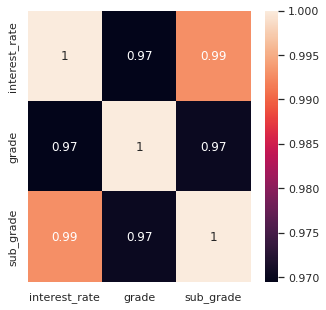

In [ ]:
#corr between variables
plt.figure(figsize = (5,5))
sns.heatmap(data = df.corr(), annot = True)
plt.show()

For this section the vizuals that I decided to create in order to go more in depth in the data were:


*   Bar Chart : inputs about number of loans per status and per category
*   Distribution Plot: inputs about skew and how data are distributed among different values
*   Line char: inputs about employment lenght vs interest rate
*   Violin Plot: inputs for homeownership per interest of rate
*   Correlation Heatmap: check correlation between interest_rate and grade and sub_grade



# Model Creation

In [ ]:
#save the target variable in X->train and Y->test
#slpit the dataset to train and test
from sklearn.model_selection import train_test_split

X = df.drop(['interest_rate'],axis=1).values
y = df['interest_rate'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)


In [ ]:
#Note: I tried first to use all the columns and after that did a PCA on them. 
#The prediction results was not good so I continue with selecting only the higly correlated attr

#PCA: from 50 columns to 3
#from sklearn.decomposition import PCA

#pca = PCA(n_components=0.95)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

#X_train.shape

(7500, 3)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

**Random Forest**

In [ ]:
#MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
 
param_grid = [{'n_estimators':[66, 70,75], 'max_depth':[10,15, 20], 'bootstrap':[True, False], 'max_features':[1, 2, 3]}]
forest = RandomForestRegressor()
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
final = grid_search.best_params_
print(final)

{'bootstrap': True, 'max_depth': 20, 'max_features': 2, 'n_estimators': 75}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

In [ ]:
rf_pred_mse= grid_search.predict(X_test)
print(mse(y_test, rf_pred_mse))

0.005989407765100349


In [ ]:
#R2

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
 
param_grid = [{'n_estimators':[66, 70,75], 'max_depth':[10,15, 20], 'bootstrap':[True, False], 'max_features':[1, 2, 3]}]
forest = RandomForestRegressor()
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)
final = grid_search.best_params_
print(final)

{'bootstrap': True, 'max_depth': 20, 'max_features': 2, 'n_estimators': 75}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

In [ ]:
rf_pred_r2= grid_search.predict(X_test)
print(r2(y_test, rf_pred_r2))

0.9997565357447327


**KNN for Regression**

In [ ]:
#MSE
from sklearn.neighbors import KNeighborsRegressor    
from sklearn.model_selection import GridSearchCV
    
model = KNeighborsRegressor()
param_grid = {'n_neighbors':[45,50,55], 'weights':['uniform', 'distance']}
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train, y_train)
final=grid_search.best_params_
print(final)

{'n_neighbors': 50, 'weights': 'distance'}


In [ ]:
knn_pred_mse= grid_search.predict(X_test)
print(mse(y_test, knn_pred_mse))

0.005922309190333349


In [ ]:
#R2
model = KNeighborsRegressor()
param_grid = {'n_neighbors':[45,50,55], 'weights':['uniform', 'distance']}
grid_search = GridSearchCV(model, param_grid, scoring="r2", cv=5)
grid_search.fit(X_train, y_train)
final=grid_search.best_params_
print(final)

{'n_neighbors': 50, 'weights': 'distance'}


In [ ]:
knn_pred_r2= grid_search.predict(X_test)
print(r2(y_test, knn_pred_mse))

0.999760427255012


**SVM**

In [ ]:
#MSE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
svr = SVR()

param_grid = {'kernel':['rbf', 'sigmoid', 'poly', 'linear'], 'C':[ 1,1.2,1.5]}
n_iter = 2
rsv = RandomizedSearchCV(svr, param_grid, n_iter=n_iter, scoring="neg_mean_squared_error")
rsv.fit(X_train, y_train)
final = rsv.best_params_
print(final)


{'kernel': 'poly', 'C': 1}


In [ ]:
svm_pred_mse= grid_search.predict(X_test)
print(mse(y_test, svm_pred_mse))

0.005922309190333349


In [ ]:
#R2
from sklearn.svm import SVR
svr = SVR()

param_grid = {'kernel':['rbf', 'sigmoid', 'poly', 'linear'], 'C':[ 1,1.2,1.5]}
n_iter = 2
rsv = RandomizedSearchCV(svr, param_grid, n_iter=n_iter, scoring="r2")
rsv.fit(X_train, y_train)
final = rsv.best_params_
print(final)

{'kernel': 'rbf', 'C': 1.5}


In [ ]:
svm_pred_R2= grid_search.predict(X_test)
print(r2(y_test, svm_pred_R2))

0.999760427255012


# Results and proposed analysis

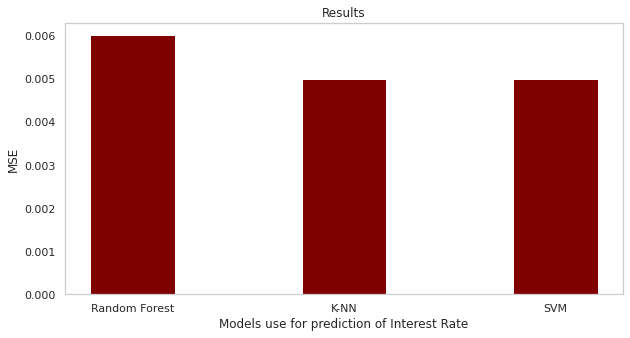

In [ ]:
from typing import MutableSet
#viz the 3 mse to show how small they are
  
# creating the dataset
data = {'Random Forest':0.005989407765100349, 'K-NN':0.005922309190333349
, 'SVM':0.005922309190333349}
Models = list(data.keys())
MSE = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, MSE, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models use for prediction of Interest Rate")
plt.ylabel("MSE")
plt.title("Results")
plt.grid(False)
plt.show()

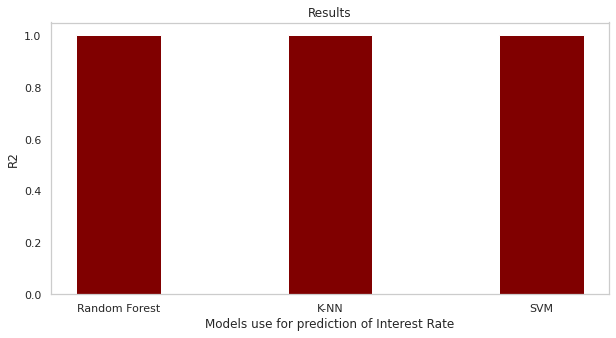

In [ ]:
from typing import MutableSet
#viz the 3 r2 to show how big they are
  
# creating the dataset
data = {'Random Forest':0.9997565357447327, 'K-NN':0.999760427255012, 'SVM':0.999760427255012}
Models = list(data.keys())
MSE = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, MSE, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models use for prediction of Interest Rate")
plt.ylabel("R2")
plt.title("Results")
plt.grid(False)
plt.show()

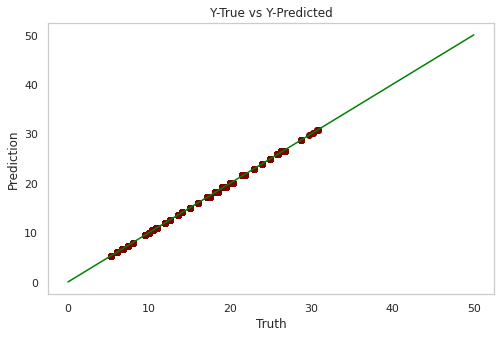

In [ ]:
#Extra explanation for SVM
#from the bellow chart for example for svm we can understand that the predicted and the truth values are almost equal
#because they fit in the diagonial line

x_plot=[0,50]
y_plot=[0,50]
plt.plot(x_plot,y_plot,color='green')
plt.scatter(y_test, svm_pred_R2, color='maroon')
plt.title("Y-True vs Y-Predicted")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.grid(False)
plt.show()

**Output:**
As we can see from the two bar chart we have both good R^2 and MSE results. In order to enchance them more I will do the followings:

*   Outlier check: (box plot, z-score ... ) 
*   Missing data instead of median with regression
*   Bootstrapping techniques
*   Run more models like: Neural Networks, Ridge Regressor etc
*   Better Hyperparameter tuning

